# Proyecto: Predicción de pasajeros sobrevivientes al Titanic mediante Árboles de decisión

### * Usaremos una base de datos sobre la información de pasajeros del Titanic. Dicha base de datos contiene campos vacíos, información numérica y no numérica; por lo que haremos un tratamiento previo a la información para poder usarla en el entrenamiento de un modelo de `random forest`

### * Extraeremos las variables necesarias para poderlas utilizar en el entrenamiento de un modelo capás de predecir la supervivencia de los pasajeros.  

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import numpy as np 

# Librería para usar el clasificador de random forest:
from sklearn.ensemble import RandomForestClassifier

# Librería para separar datos de entrenamiento y pruebas:
from sklearn.model_selection import train_test_split 

# permite codificar variables no numéricas como variables numéricas:
from sklearn import preprocessing

# metrics contiene la función para generar la matriz de confusión:
from sklearn import metrics 

%matplotlib inline
sns.set()

In [2]:
# Cargamos los datos:
# (ya estan divididos en datos de entrenamiento y de prueba)
data_train = pd.read_csv('./Datos/Titanic/titanic-train.csv')

data_test = pd.read_csv('./Datos/Titanic/titanic-test.csv')

In [3]:
# visualizamos los primeros registros de los datos de entrenamiento:
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# visualizamos los primeros registros de los datos de prueba:
data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Obtenemos dimensiones:
print('Dimension de los datos de entrenamiento:', data_train.shape )
print('Dimension de los datos de pruebas:', data_test.shape  )

Dimension de los datos de entrenamiento: (891, 12)
Dimension de los datos de pruebas: (418, 11)


In [6]:
# obtenemos información del conjunto de entrenamiento:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### podemos ver que el campo 'Age', 'Cabin' y 'Embarked' tienen campos nulos

In [7]:
# obtenemos información del conjunto de pruebas:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### podemos ver que el campo 'Age', 'Fare' y 'Cabin' tienen campos nulos

### Evidentemente el sexo de la persona es una variable a considerar en el entrenamiento del modelo. Originalmente es del tipo 'object' así que la codificaremos para que tome valores numéricos: ('hombre' --> 1; 'mujer' --> 0 ). 

### Podemos usar las siguientes funciones:

#### `label_encoder = preprocessing.LabelEncoder()`

#### `encoder_sex = label_encoder.fit_transform(data_train.Sex)`

### Nosotros usaremos la función de pandas: `get_dummies`

## A continuación rellenamos los valores con campos nulos (en los data sets: 'data_train' y 'data_test'):

In [8]:
# ********* Asignamos valor a los campos nulos del data set 'data_train':
mean_age_data_train = np.mean(data_train.Age) # <-- promedio
data_train.Age = data_train.Age.fillna( mean_age_data_train ) # <-- rellenamos con el promedio

# A los valores nulos del campo 'Embarked' les asignaremos la variable 'S':
data_train.Embarked = data_train.Embarked.fillna( 'S' )



# ********* Asignamos valor a los campos nulos del data set 'data_test':
mean_age_data_test = np.mean(data_test.Age) # <-- promedio
data_test.Age = data_test.Age.fillna( mean_age_data_test ) # <-- rellenamos con el promedio

data_test.Fare = data_test.Fare.fillna(np.mean(data_test.Fare))# <-- rellenamos con el promedio

In [9]:
# Eliminamos variables inutiles del data set 'data_train':
data_train_new = data_train.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis = 1)
data_train_new#.info()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [10]:
# Eliminamos variables inutiles del data set 'data_test':
data_test_new = data_test.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
data_test_new#.info()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


## Hasta aquí ya no tenemos campos nulos y hemos seleccionado las variables necesarias!

## A continuación identificaremos las variables categoricas y las variables numéricas:

In [11]:
# Extraemos el nombre de variables cartegoricas (ie. variables cuyos valores no son numericas ie. son del tipo 'object'):
categorical_cols = [column_name for column_name in data_train_new.columns if 
    data_train_new[column_name].nunique() < 10 
    and 
    data_train_new[column_name].dtype == 'object']

categorical_cols

# nunique() <-- regresa el número de clases en un conjunto,
# ejemplo: [5,5,5,1,1,2].nunique()  --> 3 clases:{5,1,2}                 

['Sex', 'Embarked']

In [12]:
# extraemos variables numéricas:
numerical_cols = [column_name for column_name in data_train_new.columns if 
    data_train_new[column_name].dtype in ['int64','float64'] ]

numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [13]:
# Unimos las variables categoricas y numércias:
selected_columns = categorical_cols + numerical_cols
selected_columns

['Sex', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
# Extraemos la información de las columnas seleccionadas en el data set 'data_train_new':

# Coleccionamos los campos de información seleccionada:
data_train_new = data_train_new[selected_columns]
data_train_new

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.000000,1,0,7.2500
1,female,C,1,38.000000,1,0,71.2833
2,female,S,3,26.000000,0,0,7.9250
3,female,S,1,35.000000,1,0,53.1000
4,male,S,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,male,S,2,27.000000,0,0,13.0000
887,female,S,1,19.000000,0,0,30.0000
888,female,S,3,29.699118,1,2,23.4500
889,male,C,1,26.000000,0,0,30.0000


In [15]:
# Extraemos la información de las columnas seleccionadas en el data set 'data_test_new':

# Coleccionamos los campos de información seleccionada:
data_test_new = data_test_new[selected_columns]
data_test_new

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,Q,3,34.50000,0,0,7.8292
1,female,S,3,47.00000,1,0,7.0000
2,male,Q,2,62.00000,0,0,9.6875
3,male,S,3,27.00000,0,0,8.6625
4,female,S,3,22.00000,1,1,12.2875
...,...,...,...,...,...,...,...
413,male,S,3,30.27259,0,0,8.0500
414,female,C,1,39.00000,0,0,108.9000
415,male,S,3,38.50000,0,0,7.2500
416,male,S,3,30.27259,0,0,8.0500


## Podemos ver que en los nuevos data sets las varables 'Sex' y 'Embarked' son categoricas 
## así que las convertiremos a varables numéricas:

In [16]:
# Obtenemos un conteo de los valores del campo 'Embarked' del data set 'data_train_new'
count_Embarked = data_train_new.Embarked.value_counts()
count_Embarked #<-- podemos ver que la variable 'Embarked' tiene datos de 3 clases {S,C,Q}

S    646
C    168
Q     77
Name: Embarked, dtype: int64

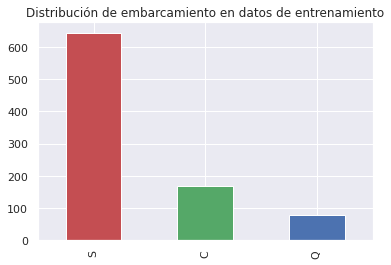

In [17]:
count_Embarked.plot(kind = 'bar', color =['r', 'g', 'b'])
plt.title('Distribución de embarcamiento en datos de entrenamiento')
plt.show()

In [18]:
# Obtenemos un conteo de los valores del campo 'Sex' del data set 'data_train_new'
count_Sex = data_train_new.Sex.value_counts()
count_Sex #<-- podemos ver que la variable 'Sex' tiene datos de 2 clases {'male', 'female'}

male      577
female    314
Name: Sex, dtype: int64

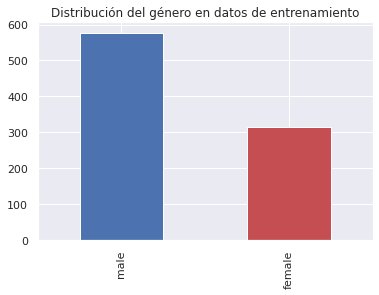

In [19]:
count_Sex.plot(kind = 'bar', color =['b', 'r'])
plt.title('Distribución del género en datos de entrenamiento')
plt.show()

## Convertimos las variables categoricas en variables numéricas, esto para poder usarlas en el entrenamiento del modelo

In [20]:
# convertimos variables categoricas en variables numéricas en el data set 'data_train_new':
dummy_encoded_data_train_new = pd.get_dummies(data_train_new)
dummy_encoded_data_train_new

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [21]:
# convertimos variables categoricas en variables numéricas en el data set 'data_test_new':
dummy_encoded_data_test_new = pd.get_dummies(data_test_new)
dummy_encoded_data_test_new

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,0,1,0,1,0
1,3,47.00000,1,0,7.0000,1,0,0,0,1
2,2,62.00000,0,0,9.6875,0,1,0,1,0
3,3,27.00000,0,0,8.6625,0,1,0,0,1
4,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1,39.00000,0,0,108.9000,1,0,1,0,0
415,3,38.50000,0,0,7.2500,0,1,0,0,1
416,3,30.27259,0,0,8.0500,0,1,0,0,1


## Dado que el objetivo es predecir (en base a las variables seleccionadas) si cierta persona vivió o murió, vamos a seleccionar el conjunto de datos a predecir (labels) y el conjunto de todas las variables de entrenamiento (features):

In [22]:
# Target o Labesls --> sobrevivieron o murieron
y_target = data_train.Survived.values

In [23]:
# Features --> Datos de entrenamiento
x_features = dummy_encoded_data_train_new.values

## Usamos la función 'train_test_split' para generar los datos de entrenamiento y pruebas:

In [24]:
# Separamos la información para entrenamiento y pruebas:
p_train = 0.85 #<-- porcentaje de datos de entrenamiento
x_train , x_test, y_train, y_test = train_test_split(x_features , y_target, train_size=p_train , random_state =1)

## A continuación creamos el modelo y lo entrenamos con los datos de entrenamiento y con los datos a predecir:

In [25]:
# creamos el clasificador de RandomForest

# parámetros:
# n_estimators <--- numero de árboles que queremos en la red
# min_samples_split <--- número mínimo de particiones en cada rama
# min_samples_leaf  <--- número mínimo de samples que tenemos al final del árbol

n_trees=150
model_forest = RandomForestClassifier(n_estimators=n_trees, min_samples_split=2)

# Entrenamos el modelo:
model_forest = model_forest.fit(x_train , y_train)

## A continuación usamos los datos de prueba para medir la precisión de las predicciones que puede hacer el modelo entrenado:

In [26]:
# Hacemos las predicciones con los datos de prueba:
y_test_pred = model_forest.predict(x_test)

In [27]:
# Generamos la matriz de confusión:
M_conf = metrics.confusion_matrix(y_test , y_test_pred)
M_conf

array([[71,  9],
       [20, 34]])

In [28]:
# Obtenemos la precision de prediccion a través de la matriz de confusión:
n_decimales = 4

accuracy = np.sum(np.diag(M_conf))/np.sum(M_conf)
np.round(accuracy*100 , n_decimales)

78.3582

In [29]:
# Obtenemos la precision de prediccion con la función 'score':

model_forest_accuracy = round( model_forest.score(x_test , y_test), n_decimales )
print('El modelo predice con un ',model_forest_accuracy*100,' % de precision')

El modelo predice con un  78.36  % de precision


## Aplicamos el modelo entrenado para predecir la sobrevivencia de un conjunto de datos desconocido:

In [30]:
# Cargamos las variables de prueba de la que no se conoce si vivieron o murieron:
x_test_unknown = dummy_encoded_data_test_new.values

In [31]:
# Hacemos la predicción:
y_test_pred_unknown = model_forest.predict(x_test_unknown)

y_test_pred_unknown = pd.DataFrame(y_test_pred_unknown)# <-- ponemos la variable en un DataFrame para poder aplicar 'value_counts()'
m_count = y_test_pred_unknown.value_counts()
m_count

0    276
1    142
dtype: int64

In [32]:
print('Con un porcentaje del ',model_forest_accuracy*100, '% se puede afirmar que de las',y_test_pred_unknown.shape[0],' personas, murieron ',m_count.values[0],'y vivieron',m_count.values[1])

Con un porcentaje del  78.36 % se puede afirmar que de las 418  personas, murieron  276 y vivieron 142
